# Scikit learn

In [188]:
from sklearn.datasets import load_boston

In [189]:
X, y = load_boston(return_X_y=True)

In [190]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [191]:
mod = KNeighborsRegressor()

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])

In [192]:
pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=1))])

In [193]:
mod.fit(X,y)

KNeighborsRegressor()

In [194]:
pred = pipe.predict(X)

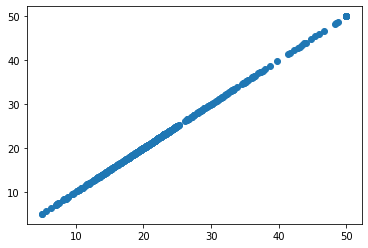

In [195]:
plt.scatter(pred, y)

In [196]:
mod = GridSearchCV(estimator=pipe,
            param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]},
            cv=3)

In [197]:
#pipe.get_params()

In [198]:
mod.fit(X, y)
pd.DataFrame(mod.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002667,3.771188e-03,0.005333,0.003771,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.007999,6.532083e-03,0.005334,0.003772,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.002678,3.787484e-03,0.005322,0.003763,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.008001,6.836514e-07,0.000000,0.000000,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.008012,1.534588e-05,0.000000,0.000000,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.008001,2.921403e-05,0.000000,0.000000,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.007998,3.154122e-05,0.000000,0.000000,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.008001,2.562602e-05,0.000000,0.000000,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.005321,3.762726e-03,0.002666,0.003770,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.000000,0.000000e+00,0.008012,0.000017,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


In [199]:
for key in load_boston():
    print(key)

data
target
feature_names
DESCR
filename


In [200]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [201]:
df = pd.DataFrame(data=X, columns=load_boston()['feature_names'])


In [202]:
df['PRICE'] = y

In [203]:
print(df.shape)

(506, 14)


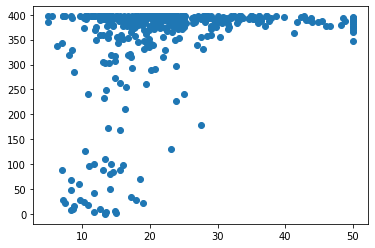

In [204]:
plt.scatter(df['PRICE'], df['B'])

In [205]:
from sklearn.preprocessing import quantile_transform

In [206]:
#df.isna().sum()/df.shape[0]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# PREPROCESSING


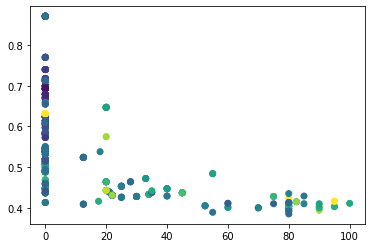

In [209]:
#without any transformation 
plt.scatter(df['ZN'], df['NOX'], c=df['PRICE'])